In [5]:
import json
import csv
import string
from collections import defaultdict

import requests
import torch as torch


def parse():
    with open('output.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=['type', 'review'])
        writer.writeheader()
        for number in range(1, 10):

            api = f"https://api.kinopoisk.dev/v1.4/review?page={number}&limit=250&selectFields=type&selectFields=review&notNullFields=type&notNullFields=review&sortField=authorId&sortType=1&type=%D0%9D%D0%B5%D0%B3%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9&type=%D0%9F%D0%BE%D0%B7%D0%B8%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9"
            response = requests.get(api, headers={
                # 'X-API-KEY': '4FYCB59-D864DZS-PJ34Z25-K2F0J50',
                # 'X-API-KEY': 'EH0HZSG-YN8M6YA-MG1ZCJK-AD84ZRF',
                'X-API-KEY': '7BNACPF-JZAMA5G-MNWERA2-PYRCPXC',
            })
            jso = json.loads(response.text)

            # Write the data rows
            for row in jso['docs']:
                writer.writerow(row)


parse()

In [6]:
import pandas as pd

df = pd.read_csv("output.csv")

df

,type,review
0,Позитивный,"Ребята в Dreamworks, кажется, поняли, в конце ..."
1,Позитивный,"«Ты навсегда в ответе за всех, кого приручил»...."
2,Позитивный,Анимационная экранизация саги о развитии отнош...
3,Позитивный,Одна из самых долгожданных картин года. Билет ...
4,Позитивный,"Как же, порой, хорошо работать с анимацией. Ес..."
...,...,...
2245,Позитивный,"Посмотрев фильм, я ужасно захотела написать к ..."
2246,Позитивный,"Была в нашей семье собака по кличке Грозный, я..."
2247,Негативный,С историей Хатико я познакомилась ещё будучи м...
2248,Позитивный,"Очень уж чувствительный фильм, такие лучше смо..."


In [7]:
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer


def make_text_pretty(text):
    stemmer = SnowballStemmer("russian")

    nltk.download('stopwords')
    rus_stopwords = stopwords.words('russian')

    text = text.translate(str.maketrans("", "", string.punctuation)).lower()

    text = text.replace("\r", "").replace("\n", "").replace("«", "").replace("»", "").replace("—", "")

    is_stopword = lambda word: word not in set(rus_stopwords)

    text = ' '.join(list(filter(is_stopword, text.split())))

    textStemmed = ' '
    for word in text.split():
        word = stemmer.stem(word)
        textStemmed += word + " "

    return textStemmed


def to_bin(text):
    if text == "Позитивный":
        return 1
    return 0


df['review'] = df['review'].apply(make_text_pretty)
df['type'] = df['type'].apply(to_bin)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skandinow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skandinow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skandinow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skandinow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skandinow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skandinow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skandinow/nltk_data...
[nltk_data]   Package stopwords i

In [8]:
df

,type,review
0,1,ребят dreamworks кажет поня конц конц так чел...
1,1,навсегд ответ ког приручилмаленьк принц антуа...
2,1,анимацион экранизац саг развит отношен дракон...
3,1,одн сам долгожда картин год билет перв сеанс ...
4,1,пор работа анимац созда какойт больш мир кото...
...,...,...
2245,1,посмотр фильм ужасн захотел написа нем реценз...
2246,1,наш сем собак кличк грозн буд помн спасл нам ...
2247,0,истор хатик познаком ещ будуч мелк рассказыва...
2248,1,очен чувствительн фильм так смотрет дом пошел...


In [9]:
word_count = defaultdict(int)

for review in df['review']:
    tokens = review.split()
    for token in tokens:
        word_count[token] += 1

sorted(word_count)
sorted_dict = {key: value for key, value in sorted(word_count.items(), key=lambda item: item[1])}

print(len(word_count), len(sorted_dict))

38292 38292


In [10]:
sorted_dict

{'отличноглавн': 1,
 'машинок': 1,
 'ахв': 1,
 'детскост': 1,
 'хейтерыдреамwоркс': 1,
 'красивостьюн': 1,
 'невероят': 1,
 'подобающ': 1,
 'порода': 1,
 'милымиит': 1,
 'беззубикапс': 1,
 'приручилмаленьк': 1,
 'антуа': 1,
 'сентэкзюперин': 1,
 'персонажемдракончик': 1,
 'миляг': 1,
 'егон': 1,
 'нипоч': 1,
 'сюжетомрассказ': 1,
 'виз': 1,
 'управител': 1,
 'действийкак': 1,
 'часть…': 1,
 'деньнеподража': 1,
 'викинговнеповторим': 1,
 'нихпрошл': 1,
 'былоудивительн': 1,
 'придетсяочен': 1,
 'увидитеоднозначн': 1,
 'захватываетесл': 1,
 'линклейтер': 1,
 'отрочествефраншиз': 1,
 'бытьиккинг': 1,
 'разумеетсямир': 1,
 'сосуществ': 1,
 'начекудин': 1,
 'целостностьест': 1,
 'делеюмор': 1,
 'зацеловывает': 1,
 'напл': 1,
 'мощнымзат': 1,
 'полчасапосмотр': 1,
 'вдохновении9': 1,
 '10scalped': 1,
 'by': 1,
 'hannabar': 1,
 '12062014': 1,
 'толькотольк': 1,
 'частьюбольш': 1,
 'пробуксовок': 1,
 'призадума': 1,
 'гиперион': 1,
 'рурк': 1,
 'бессметр': 1,
 'дракона2': 1,
 'дискретн': 1,
 '

In [37]:
def trailing_zeros(vectorizedReviews):
    min_length = min(len(vector) for vector in vectorizedReviews)
    return [vector * min_length/len(vector) for vector in vectorizedReviews]

In [38]:
reviews = df['review'].values
marks = df['type'].values
index_mapping = {word: index for index, word in enumerate(sorted_dict.keys())}
vectorizedReviews = [[index_mapping[word] for word in review.split()] for review in reviews]
padded_vectors = trailing_zeros(vectorizedReviews)

padded_vectors

[36793,
 36862,
 38093,
 38156,
 38226,
 38226,
 38284,
 36501,
 38221,
 38244,
 38053,
 38180,
 38156,
 38290,
 38141,
 38199,
 38277,
 38255,
 38290,
 37406,
 37805,
 22135,
 38288,
 38277,
 38075,
 26475,
 22136,
 0,
 36181,
 37546,
 37527,
 38190,
 36763,
 36974,
 32917,
 37368,
 37613,
 37996,
 38284,
 37627,
 36691,
 35474,
 37036,
 34169,
 38053,
 35015,
 22137,
 38061,
 1,
 38079,
 38134,
 30081,
 34737,
 35837,
 38289,
 35264,
 37710,
 37067,
 38287,
 28654,
 37450,
 37645,
 38179,
 35678,
 38182,
 35679,
 2,
 38270,
 22138,
 35016,
 38245,
 38250,
 36138,
 38204,
 37937,
 36954,
 38183,
 37977,
 38216,
 38054]

In [46]:
from sklearn.model_selection import train_test_split
from torch import nn, optim


#hypers

seq_len = 28
input_len = 28
hidden_size = 713
num_classes = 2
num_epochs = 1000
learning_rate = 0.02
emb_size = 10000
batch_size = 64

In [47]:
class LSTM(nn.Module):
    def __init__(self, input_len, hidden_size, num_classes):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_embeddings=input_len, embedding_dim=hidden_size)
        self.lstm = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, batch_first=True)
        self.fc = torch.nn.Linear(in_features=hidden_size, out_features=num_classes)

    def forward(self, X):
        print(len(X))
        print(len(X[0]))

        embedded = self.embedding(X)
        lstm_out,_ = self.lstm(embedded)

        return self.fc(lstm_out[:,-1,:])



In [48]:
padded_vectors = torch.tensor(padded_vectors)
# padded_vectors = padded_vectors.to(torch.long)
marks = torch.tensor(marks)
# marks = marks.to(torch.long)

/var/folders/c8/lndlklrd3fjb8pr18b6jf7vjj2fnpf/T/ipykernel_10331/1925555233.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  padded_vectors = torch.tensor(padded_vectors)
/var/folders/c8/lndlklrd3fjb8pr18b6jf7vjj2fnpf/T/ipykernel_10331/1925555233.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  marks = torch.tensor(marks)


In [55]:
def train(X, Y, num_epochs):
    X_train, X_text, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    model = LSTM(len(X), hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    train_history=[]
    test_history=[]
    for epoch in range(num_epochs):
        ## train

        # Обнуление градиентов
        optimizer.zero_grad()
        # Прямой проход
        outputs = model(X_train)
        # Вычисление функции потерь
        loss = criterion(Y_train, outputs)
        # Обратное распространение ошибки
        loss.backward()
        # Обновление весов
        optimizer.step()

        train_history.append(loss.item())
        if epoch % 100 == 0:
            print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

    return model


  1%|          | 2/300 [00:00<00:51,  5.76it/s]

Epoch [1/1000], Loss: 0.6973


 34%|███▍      | 102/300 [00:17<00:32,  6.08it/s]

Epoch [101/1000], Loss: 0.0046


 67%|██████▋   | 202/300 [00:33<00:16,  6.05it/s]

Epoch [201/1000], Loss: 0.0003


100%|██████████| 300/300 [00:49<00:00,  6.08it/s]


roc auc 0.641 (на 0.141 лучше рандома)


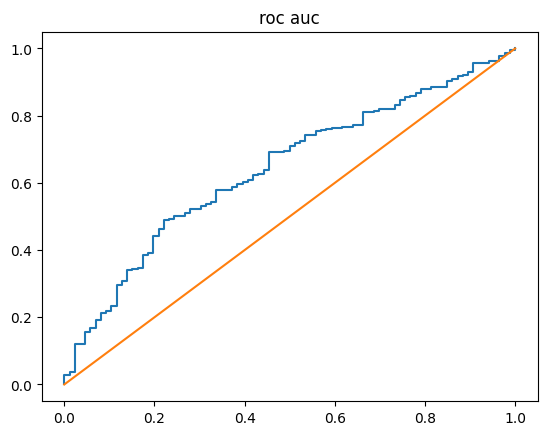

LSTM(
  (embedding): Embedding(38292, 10)
  (lstm): LSTM(10, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=2, bias=True)
)

In [56]:
train(padded_vectors, marks, num_epochs)

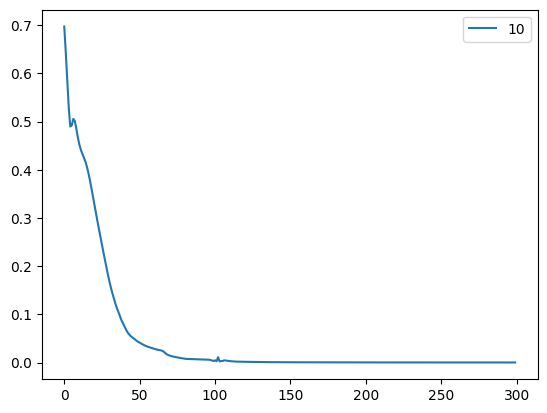

In [57]:
print(len(padded_vectors[0]), len(marks))